In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import casadi as ca
from lie.SE23 import *
from flowpipe.inner_bound import *
from flowpipe.outer_bound import *

In [2]:
omega1 = [-0.5, 0.5]
omega2 = [-0.5, 0.5]
omega3 = [-0.2, 0.2]
omega1_land = [-0.1, 0.1]
omega2_land = [-0.5, 0.5]
omega3_land = [-0.1, 0.1]

In [3]:
sol = find_omega_invariant_set(omega1, omega2, omega3)
P = sol['P']

In [4]:
e0 = np.array([0,0,0]) # initial error
beta = (e0.T@P@e0) # initial Lyapnov value
points, val = omega_invariant_set_points(sol, 2, .1, beta)

In [5]:
omegabound = omega_bound(omega1, omega2, omega3, 0.1, beta) # result for inner bound
print(omegabound)

0.03162277666795749


In [6]:
sol_LMI = find_se23_invariant_set([1.5, -1.5], [1.5, -1.5], [-9.8], omega1, omega2, omega3, 0.8) # a, omega, alpha (note that alpha has to be try and error to find a feasible one)
sol_LMI_land = find_se23_invariant_set([4, -4], [0.1], [-10.5, -9], omega1_land, omega2_land, omega3_land, 0.8) # a, omega, alpha (note that alpha has to be try and error to find a feasible one)

0.8
optimal
0.8
optimal


In [7]:
e = np.array([.0,.0,.0,0,0,0]) # Lie Group
e0 = ca.DM(SE3Dcm.vee(SE3Dcm.log(SE3Dcm.matrix(e))))
e0 = np.array([e0]).reshape(6,)
ebeta = (e0[0:3].T@P@e0[0:3])
points, val = se23_invariant_set_points(sol_LMI, 20, omegabound, 0.1, ebeta)

In [8]:
ebeta_theta = (e0[3:].T@P@e0[3:])
points_theta, val = se23_invariant_set_points_theta(sol_LMI, 20, omegabound, .1, ebeta_theta)

In [9]:
inv_points = np.zeros((3,points.shape[1]))
for i in range(points.shape[1]):
    Lie_points = SE3Dcm.wedge(np.array([points[0,i], points[1,i], points[2,i], points_theta[0,i], points_theta[1,i], points_theta[2,i]]))
    exp_points = ca.DM(SE3Dcm.vector(SE3Dcm.exp(Lie_points)))
    exp_points = np.array(exp_points).reshape(6,)
    inv_points[:,i] = np.array([exp_points[0], exp_points[1], exp_points[2]])

/tmp/ipykernel_94983/4185715080.py:52: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


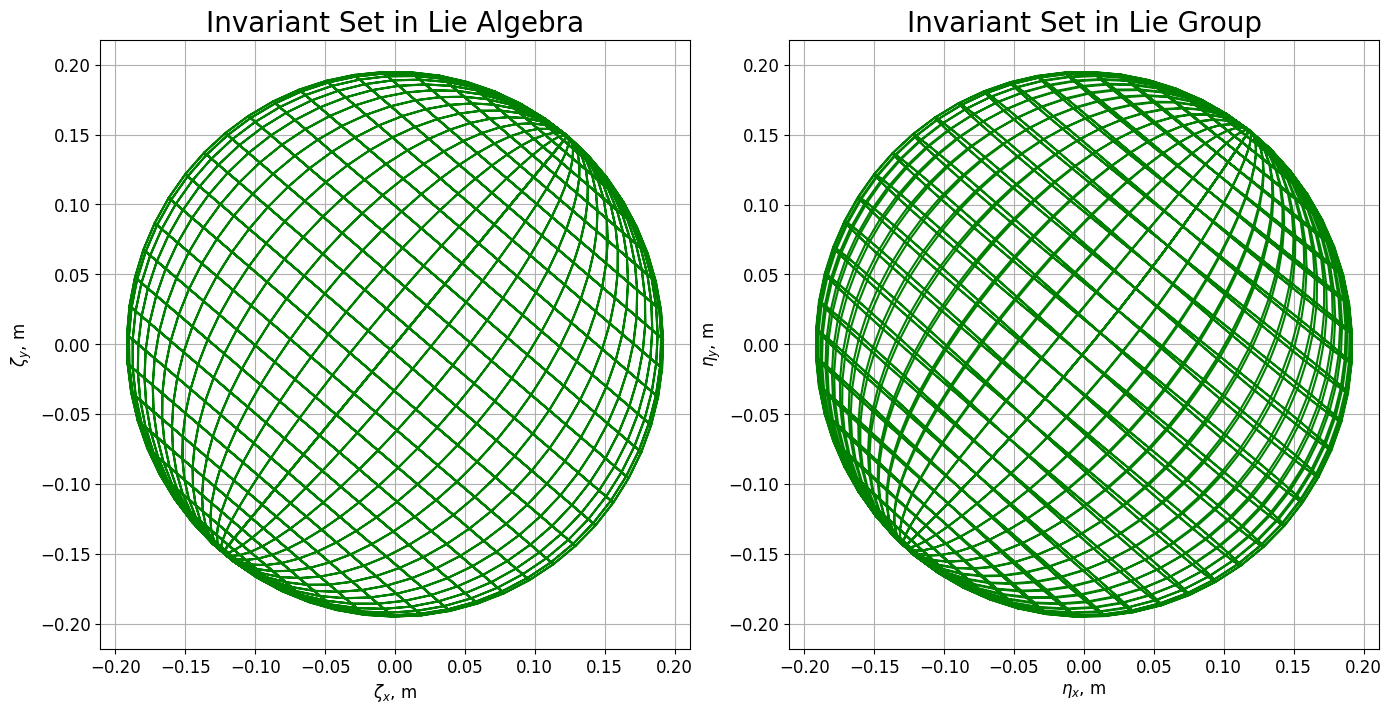

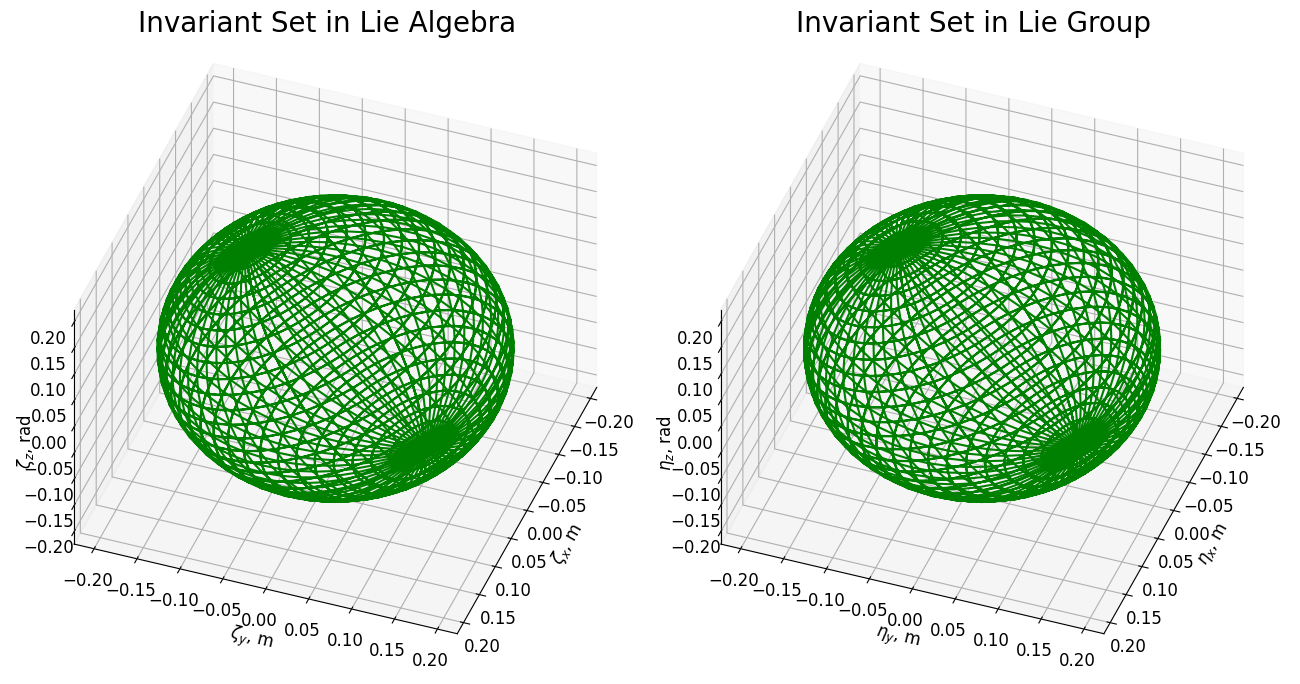

In [10]:
plt.figure(figsize=(14,7))
plt.rcParams.update({'font.size': 12})
ax1 = plt.subplot(121)
ax1.plot(points[0, :], points[1, :], 'g', label='with Dynamic Inversion')
# ax.plot(pointscl[0, :], pointscl[1, :], 'b', linewidth=0.5, label='without Dynamic Inversion')
ax1.set_xlabel('$\\zeta_x$, m')
ax1.set_ylabel('$\\zeta_y$, m')
# ax.plot(xopt.x,xopt.y,'ro')
plt.axis('equal')
plt.grid(True)
# plt.legend(loc=1)
ax2 = plt.subplot(122)
ax2.plot(inv_points[0, :-1], inv_points[1, :-1], 'g', label='with Dynamic Inversion')
# ax2.plot(inv_pointscl[0, :-1], inv_pointscl[1, :-1], 'b', linewidth=0.5, label='without Dynamic Inversion')
# ax2.plot(e[0],e[1],'ro')
ax2.set_xlabel('$\\eta_x$, m')
ax2.set_ylabel('$\\eta_y$, m')
plt.grid(True)
# plt.legend(loc=1)
plt.axis('equal')
plt.tight_layout()
ax1.set_title('Invariant Set in Lie Algebra', fontsize=20)
ax2.set_title('Invariant Set in Lie Group', fontsize=20)
# plt.savefig('figures/Invariant_l.eps', format='eps', bbox_inches='tight')

plt.figure(figsize=(14,7))
ax1 = plt.subplot(121, projection='3d', proj_type='ortho', elev=40, azim=20)
# ax.plot3D(e0[0], e0[1], e0[2], 'ro');
ax1.plot3D(points[0, :], points[1, :], points[2, :],'g', label='with Dynamic Inversion')
# ax.plot3D(pointscl[0, :], pointscl[1, :], pointscl[2, :],'b', linewidth=0.5, label='without Dynamic Inversion')
ax1.set_xlabel('$\\zeta_x$, m')
ax1.set_ylabel('$\\zeta_y$, m')
ax1.set_zlabel('$\\zeta_z$, rad', labelpad=1)
ax1.set_title('Invariant Set in Lie Algebra', fontsize=20)
# plt.subplots_adjust(left=9, right=10, top=0.5, bottom=0.08)
# plt.tight_layout()
plt.axis('auto')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
# plt.legend(loc=1)
ax2 = plt.subplot(122, projection='3d', proj_type='ortho', elev=40, azim=20)
# ax2.plot3D(e[0], e[1], e[2], 'ro');
ax2.plot3D(inv_points[0, :], inv_points[1, :], inv_points[2, :], 'g', label='with Dynamic Inversion')
# ax2.plot3D(inv_pointscl[0, :], inv_pointscl[1, :], inv_pointscl[2, :], 'b', linewidth=0.5, label='without Dynamic Inversion')
# ax2.plot3D(e[0], e[1], e[2], 'ro');
ax2.set_xlabel('$\\eta_x$, m')
ax2.set_ylabel('$\\eta_y$, m')
ax2.set_zlabel('$\\eta_z$, rad')
ax2.set_title('Invariant Set in Lie Group', fontsize=20)
plt.axis('auto')
plt.subplots_adjust(left=0.45, right=1, top=0.5, bottom=0.08)
# plt.legend(loc=1)
plt.tight_layout()
# plt.savefig('figures/Invariant3d_l.eps', format='eps', bbox_inches='tight')

In [13]:
from bezier.bezier_planning import generate_path, derive_bezier6


In [14]:
bezier6 = derive_bezier6()
bc_t = np.array(
    [  # boundary conditions
        [
            [0, 0, 0],
            [1, 0, 0],
            [1, 1, 0],
            [2, 1, 0],
            [2, 2, 0],
            [1, 2, 0],
            [0, 2, 0],
            [-1, 2, 0],
            [-2,2,0],
            [-2,1,0],
            [-2,0,0]
        ],  # pos
        [
            [0, 0, 0],
            [0.3, 0, 0],
            [0, 0.3, 0],
            [0.3, 0, 0],
            [0, 0.3, 0],
            [-0.3, 0, 0],
            [-0.3, 0, 0],
            [-0.3, 0, 0],
            [-0.3, 0, 0],
            [0, -0.3, 0],
            [0, 0, 0]
        ],  # vel
    ]
)
# solve for bezier trajectories
k = 10
ref = generate_path(bc_t, k)
x = ref['traj_x']
y = ref['traj_y']
z = ref['traj_z']
t = ref['T']
Px = ref['anchor_x']
Py = ref['anchor_y']
Pz = ref['anchor_z']

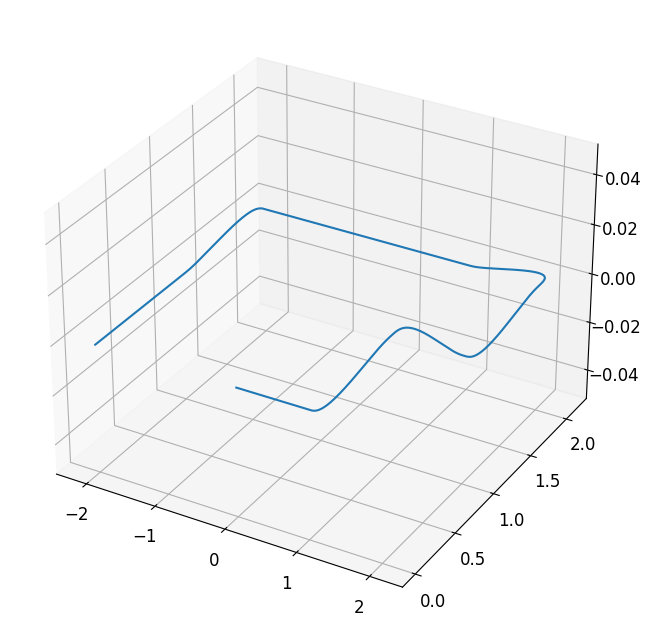

In [15]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")
ax.plot(x, y, z)

In [17]:
from sim.multirotor_control import *

In [18]:
# calculte bound along time (small disturbance case)
n = 80
T0_list = ref['T0']
T = np.cumsum(T0_list)
t_vect = np.linspace(1e-5,np.cumsum(T0_list)[-1],n)
bound_s = np.zeros((6,n))
for i in range(0,n):
    for k in range(T.shape[0]):
        if k==0 and t_vect[i] <= T[k]:
            traj_x = np.array(bezier6['bezier6_traj'](t_vect[i], ref['T0'][k], Px[k])).T
            traj_y = np.array(bezier6['bezier6_traj'](t_vect[i], ref['T0'][k], Py[k])).T
            traj_z = np.array(bezier6['bezier6_traj'](t_vect[i], ref['T0'][k], Pz[k])).T
        elif k > 0 and T[k-1] < t_vect[i] <= T[k]:
            traj_x = np.array(bezier6['bezier6_traj'](t_vect[i]-T[k-1], ref['T0'][k], Px[k])).T
            traj_y = np.array(bezier6['bezier6_traj'](t_vect[i]-T[k-1], ref['T0'][k], Py[k])).T
            traj_z = np.array(bezier6['bezier6_traj'](t_vect[i]-T[k-1], ref['T0'][k], Pz[k])).T
    rx = traj_x[:,0][0]
    ry = traj_y[:,0][0]
    rz = traj_z[:,0][0]
    ib = inv_bound(sol_LMI, t_vect[i], omegabound, .1, ebeta, ebeta_theta)
    ib[0] = rx + ib[0]
    ib[1] = ry + ib[1]
    ib[2] = rz + ib[2]
    ib[3] = rx + ib[3]
    ib[4] = ry + ib[4]
    ib[5] = rz + ib[5]
    bound_s[:,i] = ib

0.65
0.7
0.8
0.9
2


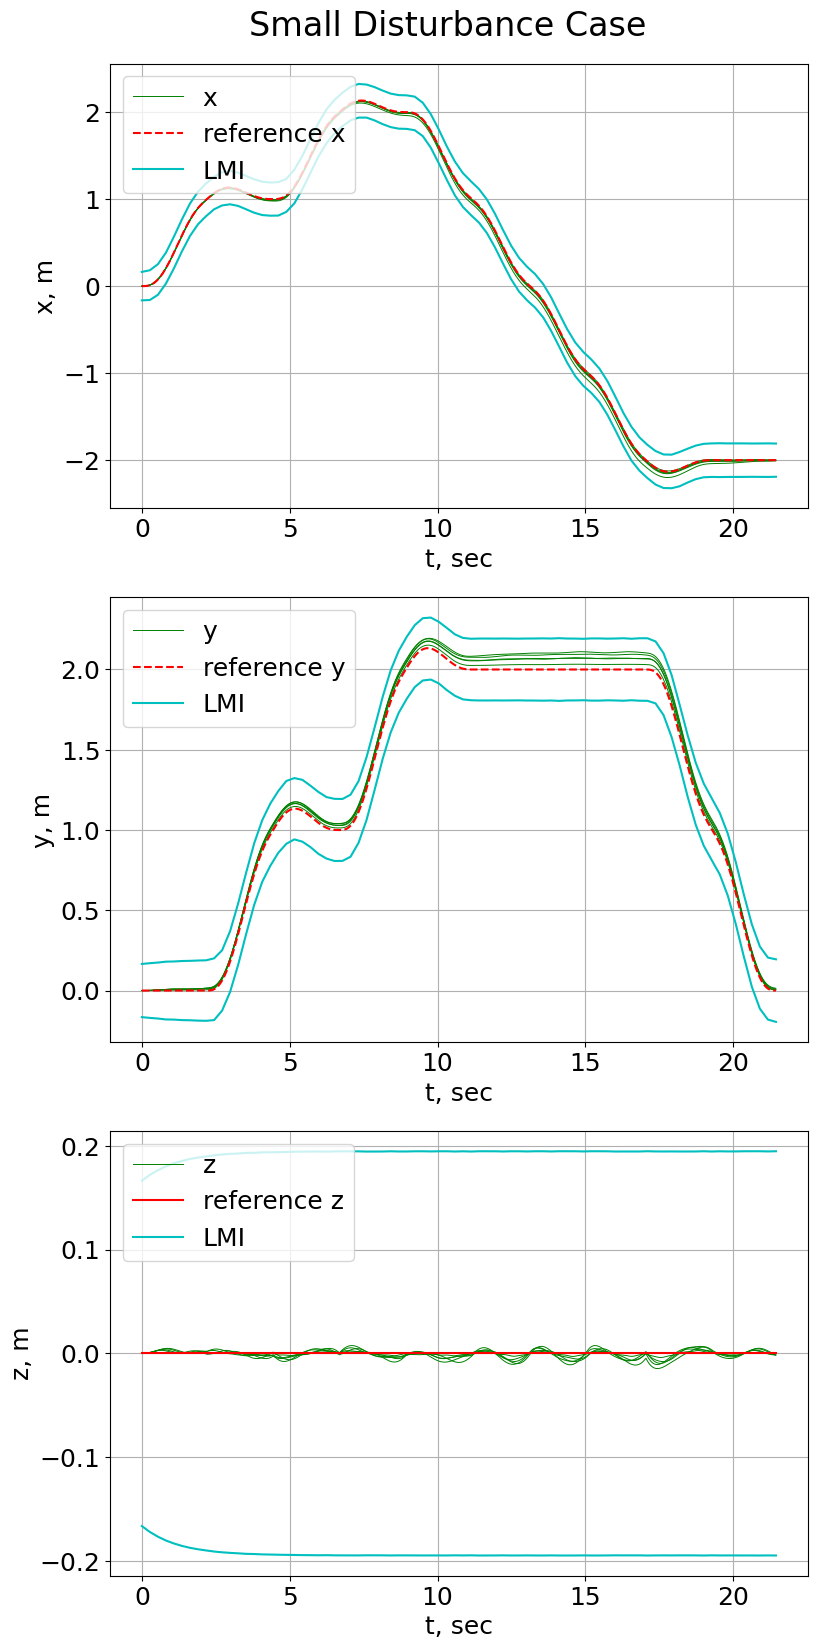

In [21]:
freq = [0.65,0.7,0.8,0.9,2]#[0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
ro1, ro2, ro3 = plot_rover_sim(freq, ref, 0.05, 0.01, bound_s)

In [47]:
bc_land = np.array(
    [  # boundary conditions
        [
            [30, 0, 5],
            [0, 0, 0],
        ],  # pos
        [
            [-0.5, 0, -0.1],
            [0, 0, 0],
        ],  # vel
    ]
)
# solve for bezier trajectories
k = 10
ref_land = generate_path(bc_land, k)
x_land = ref_land['traj_x']
y_land = ref_land['traj_y']
z_land = ref_land['traj_z']
t_land = ref_land['T']
Px_land = ref_land['anchor_x']
Py_land = ref_land['anchor_y']
Pz_land = ref_land['anchor_z']

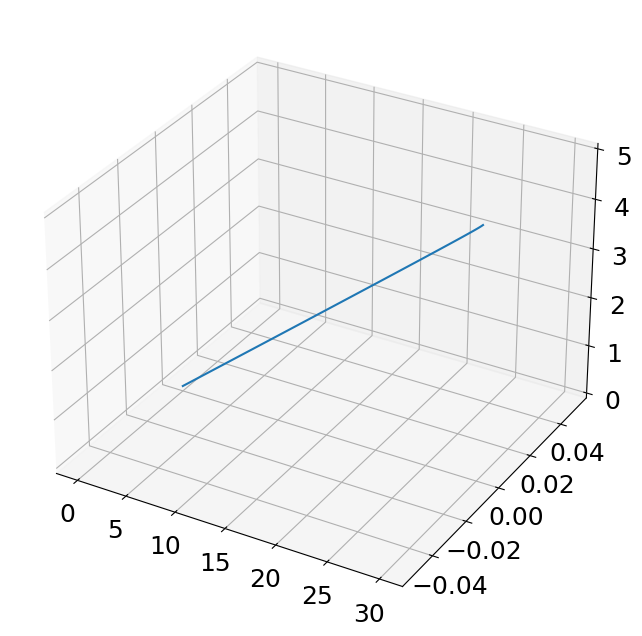

In [48]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")
ax.plot(x_land, y_land, z_land)

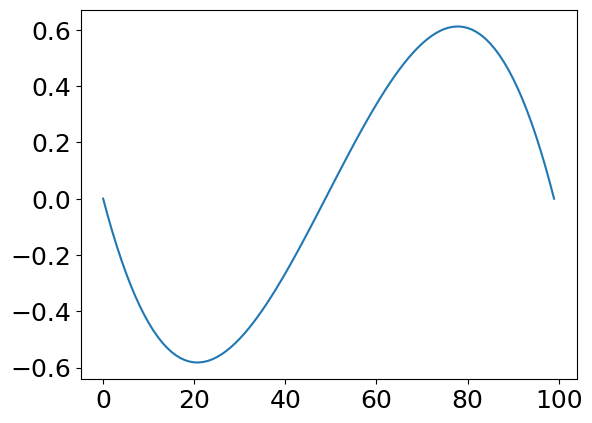

In [49]:
plt.plot(ref_land['acc_z'])

In [337]:
# calculte bound along time (small disturbance case)
n = 80
T0_list = ref_land['T0']
T = np.cumsum(T0_list)
t_vect = np.linspace(1e-5,np.cumsum(T0_list)[-1],n)
bound_land = np.zeros((6,n))
for i in range(0,n):
    for k in range(T.shape[0]):
        if k==0 and t_vect[i] <= T[k]:
            traj_x = np.array(bezier6['bezier6_traj'](t_vect[i], T0_list[k], Px_land[k])).T
            traj_y = np.array(bezier6['bezier6_traj'](t_vect[i], T0_list[k], Py_land[k])).T
            traj_z = np.array(bezier6['bezier6_traj'](t_vect[i], T0_list[k], Pz_land[k])).T
        elif k > 0 and T[k-1] < t_vect[i] <= T[k]:
            traj_x = np.array(bezier6['bezier6_traj'](t_vect[i]-T[k-1], T0_list[k], Px_land[k])).T
            traj_y = np.array(bezier6['bezier6_traj'](t_vect[i]-T[k-1], T0_list[k], Py_land[k])).T
            traj_z = np.array(bezier6['bezier6_traj'](t_vect[i]-T[k-1], T0_list[k], Pz_land[k])).T
    rx = traj_x[:,0][0]
    ry = traj_y[:,0][0]
    rz = traj_z[:,0][0]
    ib = inv_bound(sol_LMI_land, t_vect[i], omegabound, .1, ebeta, ebeta_theta)
    ib[0] = rx + ib[0]
    ib[1] = ry + ib[1]
    ib[2] = rz + ib[2]
    ib[3] = rx + ib[3]
    ib[4] = ry + ib[4]
    ib[5] = rz + ib[5]
    bound_land[:,i] = ib

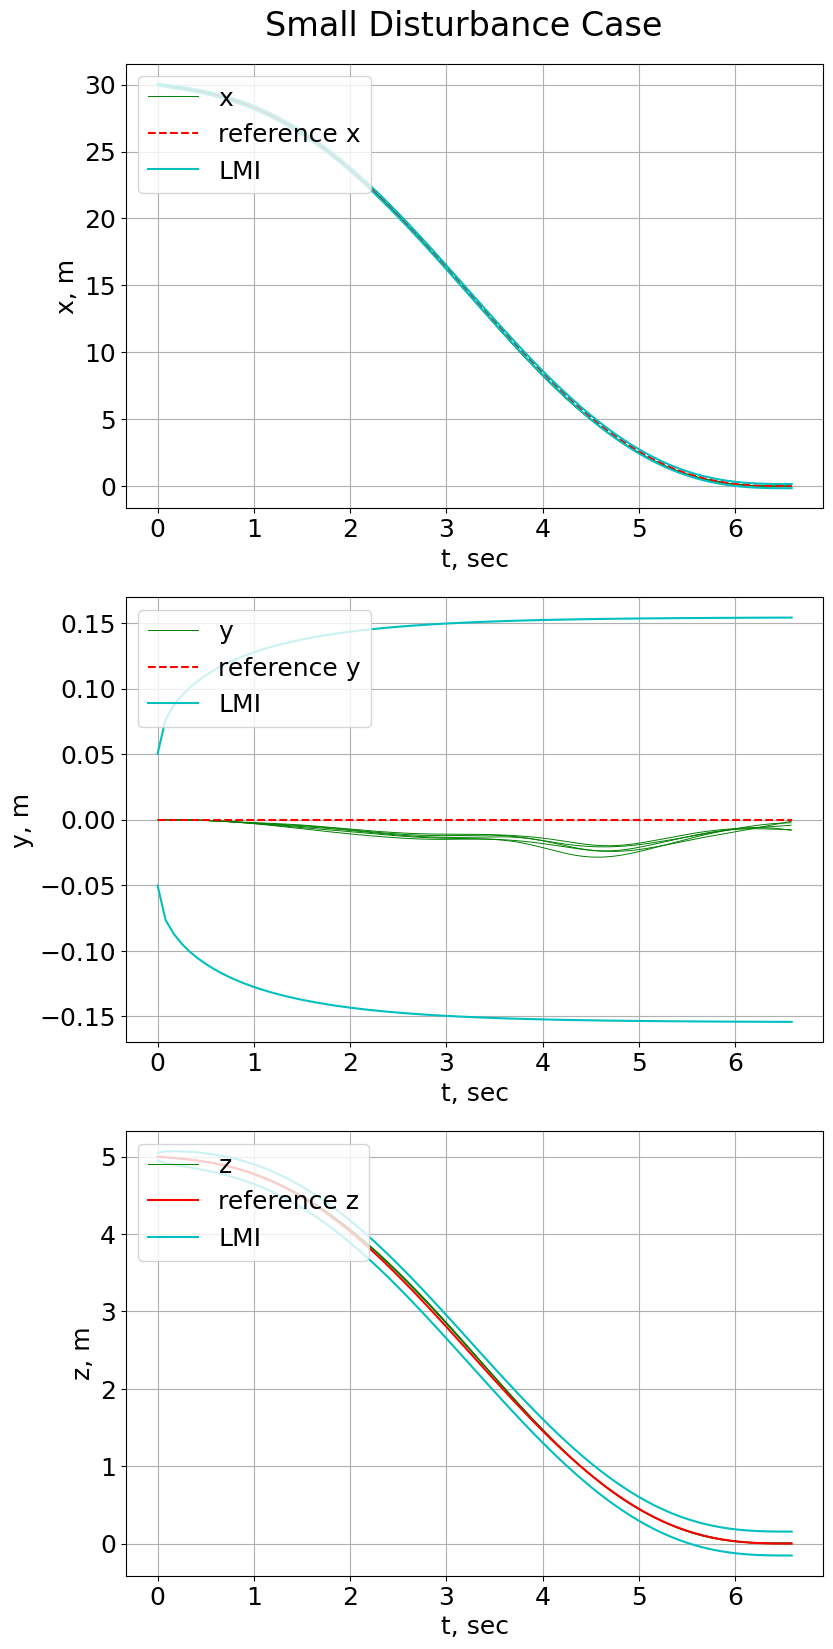

In [339]:
freq = [0.5, 0.6, 0.7, 0.8, 0.9]
ro1, ro2, ro3 = plot_rover_sim(freq, ref_land, 0.1, 0.01, bound_land)